<a href="https://colab.research.google.com/github/siddharthkhare95/Car-demand-/blob/main/Car_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [ ]:
df_train =  pd.read_csv('/content/drive/MyDrive/Interview/Job A thon/train_E1GspfA.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Interview/Job A thon/test_6QvDdzb.csv')

In [ ]:
df_train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
df_test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


# Feature Engineering

In [ ]:
# converting date column from object to datetime

df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# creating new columns month and year

df_train['month'] = pd.DatetimeIndex(df_train['date']).month
df_test['month'] = pd.DatetimeIndex(df_test['date']).month

df_train['year'] = pd.DatetimeIndex(df_train['date']).year
df_test['year'] = pd.DatetimeIndex(df_test['date']).year

In [ ]:
df_train['weekday'] = df_train['date'].apply(lambda x : x.weekday())
df_test['weekday'] = df_test['date'].apply(lambda x : x.weekday())  # 0 is monday 6 is sunday 

In [ ]:
df_train['workingday'] = df_train['weekday'].apply(lambda x: 0 if x>=5 else 1)
df_test['workingday'] = df_test['weekday'].apply(lambda x: 0 if x>=5 else 1)

In [ ]:
df_train['weekday'].value_counts()

4    2671
5    2657
6    2649
0    2589
2    2565
1    2564
3    2552
Name: weekday, dtype: int64

In [ ]:
df_train.describe()

,hour,demand,month,year,weekday,workingday
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,6.470324,2019.396997,3.025867,0.709212
std,6.544963,41.678988,3.618189,0.810979,2.003638,0.454138
min,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000
25%,8.000000,43.000000,3.000000,2019.000000,1.000000,0.000000
50%,13.000000,71.000000,7.000000,2019.000000,3.000000,1.000000
75%,18.000000,98.000000,10.000000,2020.000000,5.000000,1.000000
max,23.000000,379.000000,12.000000,2021.000000,6.000000,1.000000


# EDA

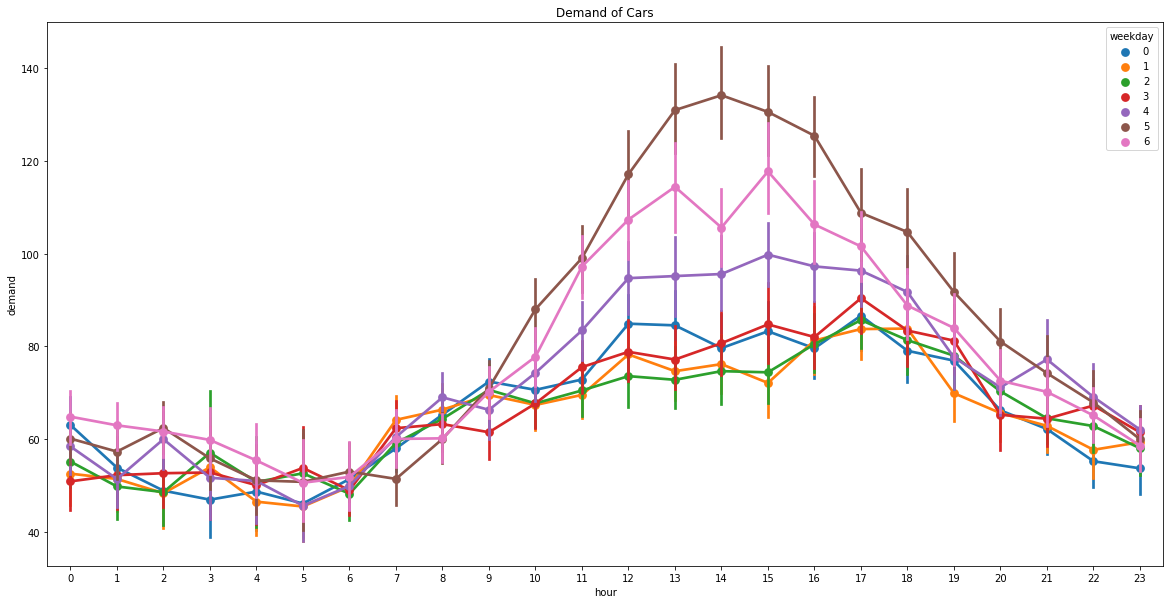

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_train, x='hour', y='demand',hue ='weekday',ax=ax)
ax.set(title='Demand of Cars')
plt.show()

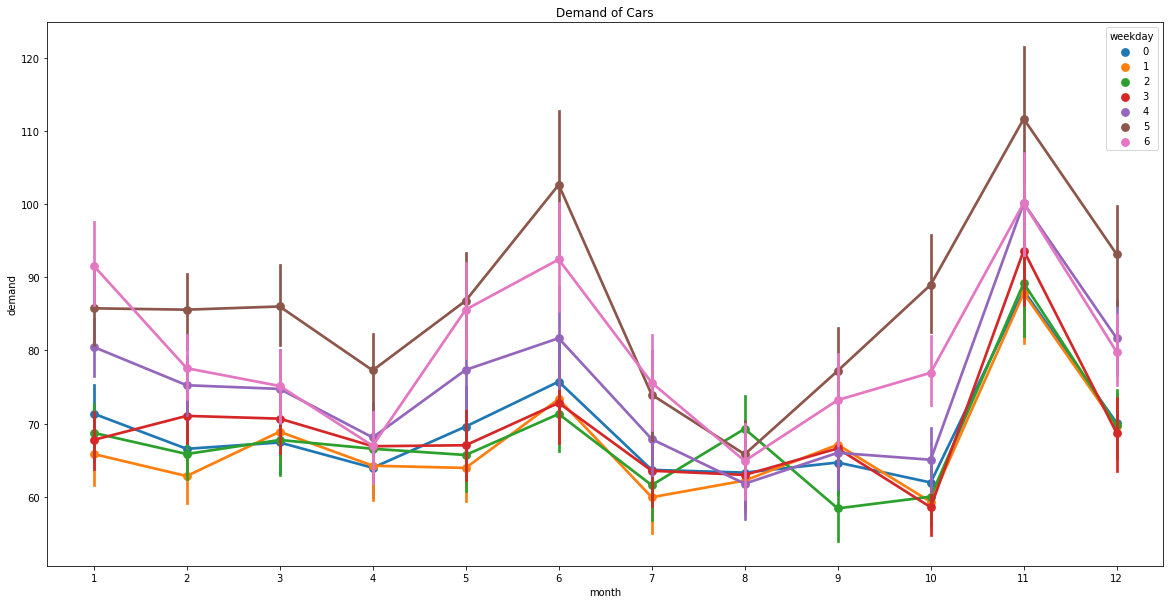

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_train, x='month', y='demand',hue='weekday',ax=ax)
ax.set(title='Demand of Cars')
plt.show()

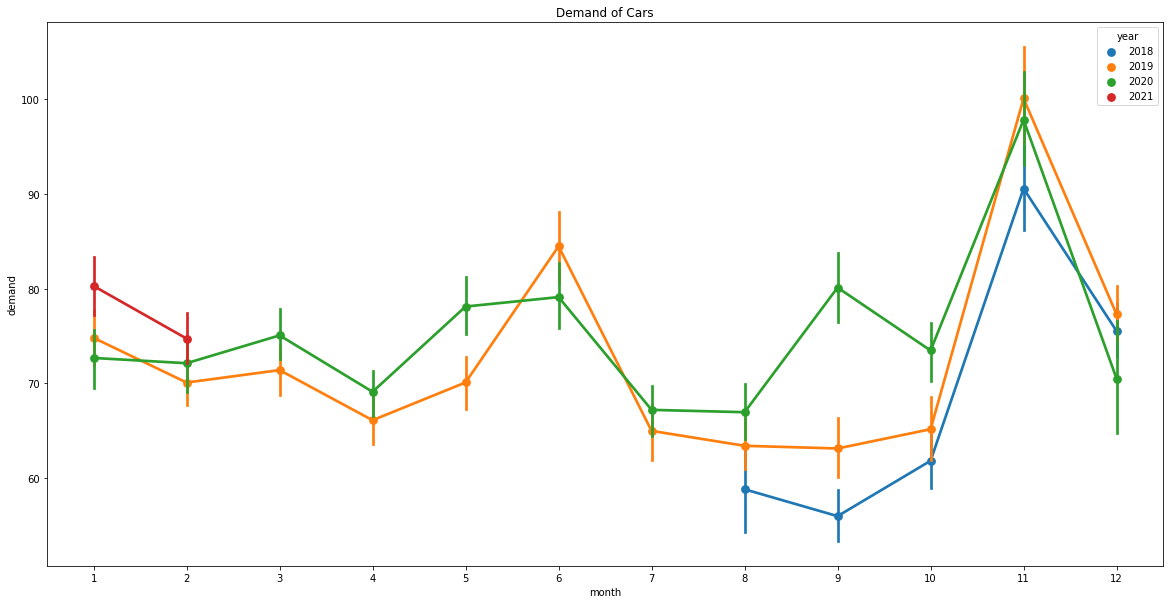

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_train, x='month', y='demand',hue='year',ax=ax)
ax.set(title='Demand of Cars')
plt.show()

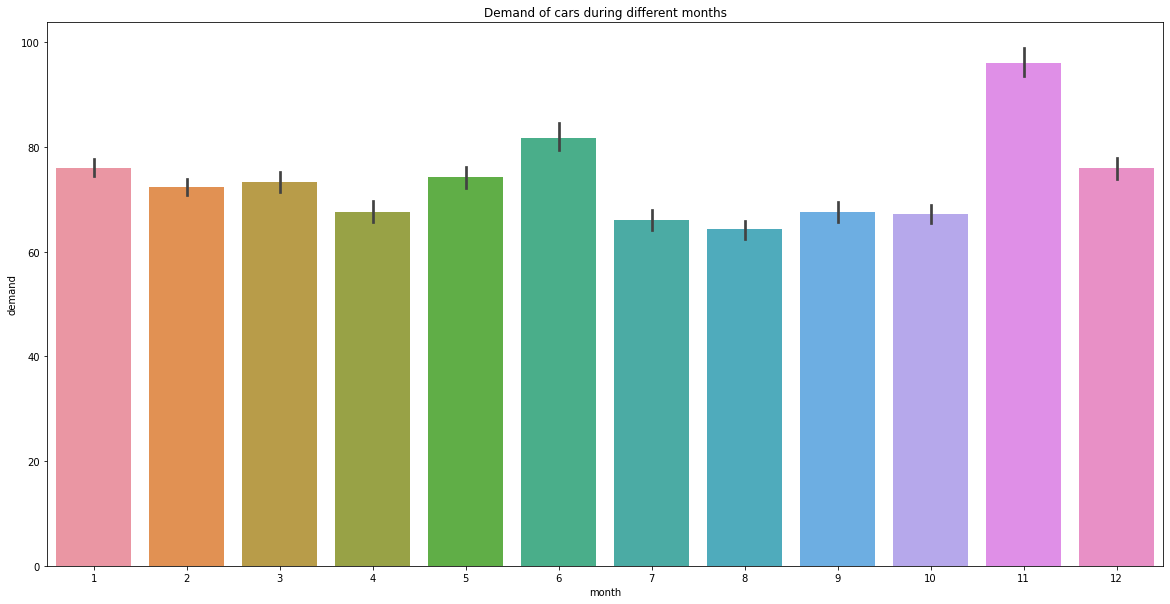

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_train, x='month', y='demand', ax=ax)
ax.set(title='Demand of cars during different months')
plt.show()

[Text(0.5, 1.0, 'Demand of cars during different days')]

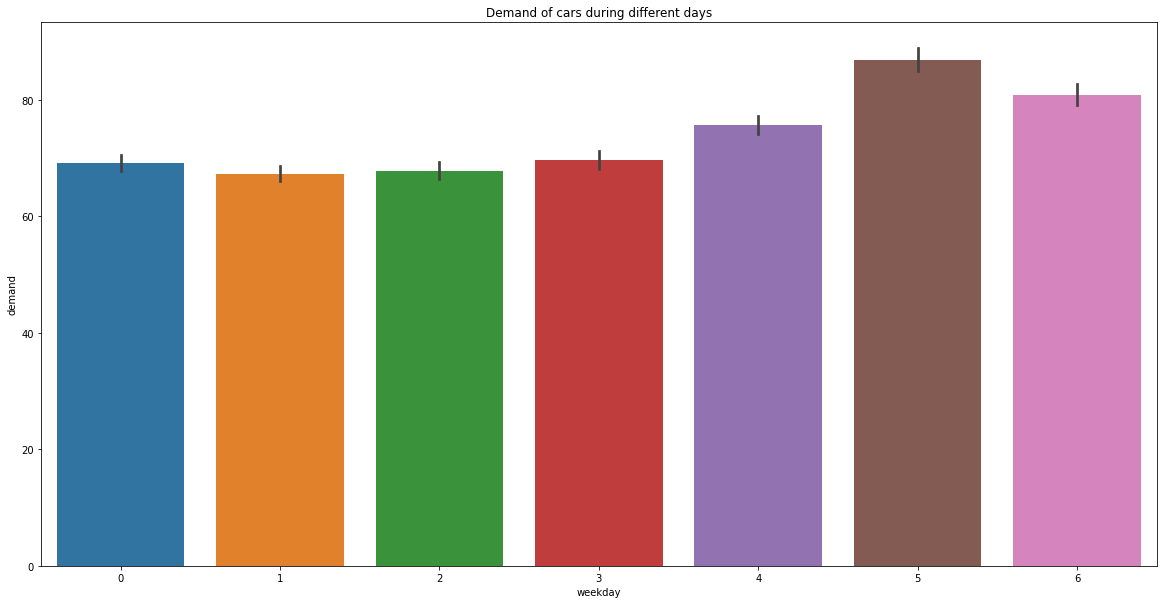

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_train, x='weekday', y='demand', ax=ax)
ax.set(title='Demand of cars during different days')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


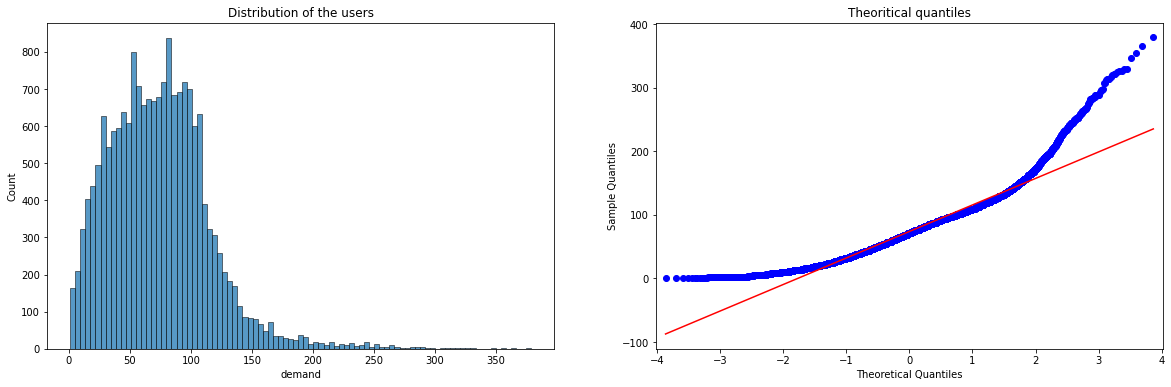

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.histplot(df_train['demand'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df_train['demand'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')
plt.show()

In [ ]:
df_train[['demand']].skew()

demand    1.128438
dtype: float64

In [ ]:
df_train[['demand']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
demand,1.128438,3.300549


In [ ]:
df_train['demand'] = np.sqrt(df_train['demand'])

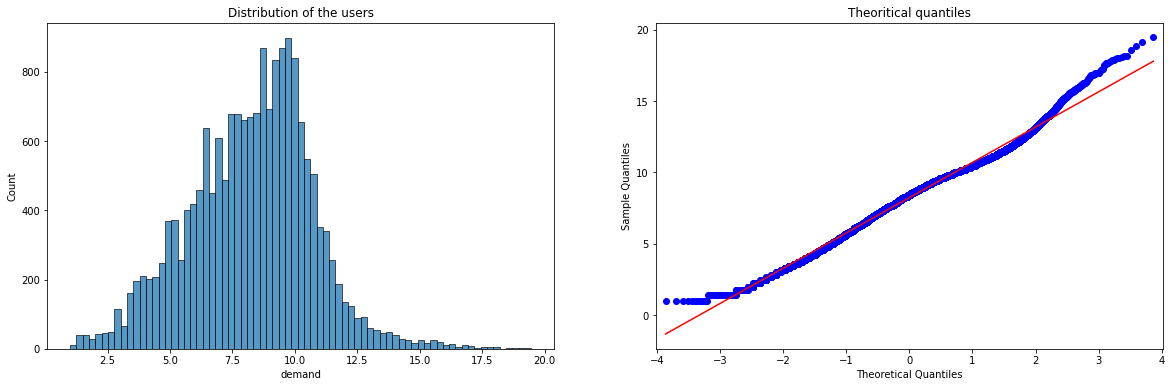

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.histplot(df_train['demand'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df_train['demand'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')
plt.show()

In [ ]:
df_train[['demand']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
demand,-0.022275,0.375619


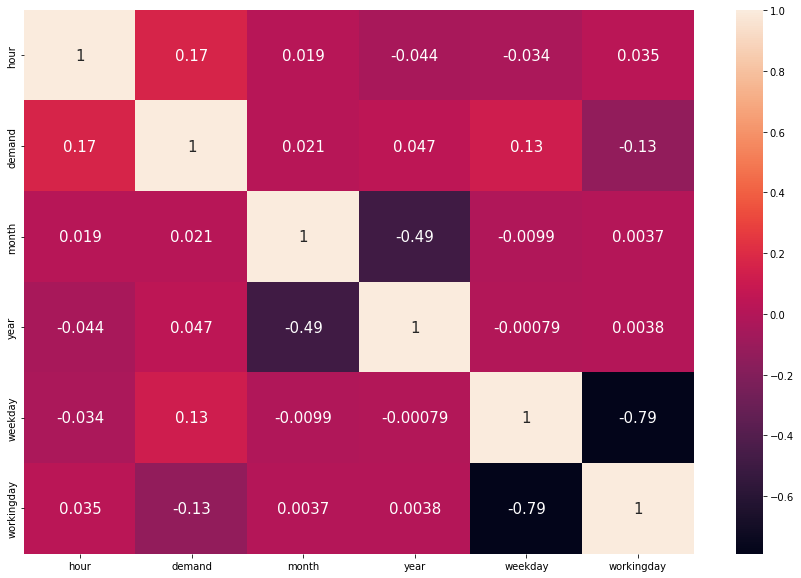

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [ ]:
df_mean = df_train.groupby('date').mean()

In [ ]:
df_mean['date'] = df_mean.index

In [ ]:
df_mean.head(20)

,hour,demand,month,year,weekday,workingday,date
date,,,,,,,
2018-08-18,16.692308,6.577082,8.0,2018.0,5.0,0.0,2018-08-18
2018-08-19,13.933333,8.036025,8.0,2018.0,6.0,0.0,2018-08-19
2018-08-20,13.714286,7.367575,8.0,2018.0,0.0,1.0,2018-08-20
2018-08-21,14.066667,7.550365,8.0,2018.0,1.0,1.0,2018-08-21
2018-08-22,13.937500,7.403886,8.0,2018.0,2.0,1.0,2018-08-22
2018-08-23,14.642857,7.625925,8.0,2018.0,3.0,1.0,2018-08-23
2018-08-24,14.437500,7.660837,8.0,2018.0,4.0,1.0,2018-08-24
2018-08-25,14.125000,7.399112,8.0,2018.0,5.0,0.0,2018-08-25
2018-08-26,13.470588,7.419242,8.0,2018.0,6.0,0.0,2018-08-26


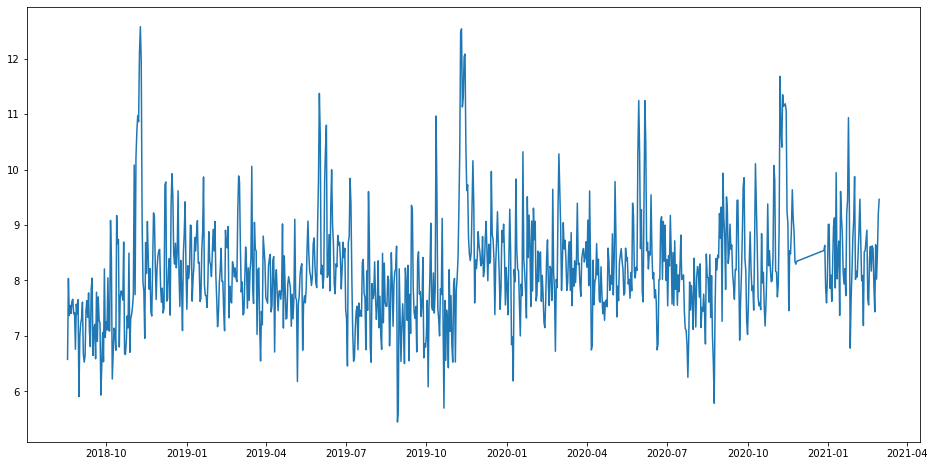

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_mean['date'],df_mean['demand'])

In [ ]:
df_oh = df_train

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [ ]:
df_train.columns

Index(['date', 'hour', 'demand', 'month', 'year', 'weekday', 'workingday'], dtype='object')

In [ ]:
cols = ['hour','month','weekday','workingday']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,date,demand,year,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,2018-08-18,9.539392,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2018-08-18,4.582576,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2018-08-18,4.795832,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018-08-18,10.198039,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2018-08-18,9.000000,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_test_oh = df_test

for col in cols:
    df_test_oh = one_hot_encoding(df_test_oh, col)
df_test_oh.head()

,date,year,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,2021-03-01,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2021-03-01,2021,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2021-03-01,2021,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-03-01,2021,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-03-01,2021,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_oh.columns

Index(['date', 'demand', 'year', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1'],
      dtype='object')

In [ ]:
df_test_oh.columns

Index(['date', 'year', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1'],
      dtype='object')

In [ ]:
df_oh.columns.difference(df_test_oh.columns)

Index(['demand'], dtype='object')

# Input Split

In [ ]:
X = df_oh.drop(columns=['date', 'demand'], axis=1)
y = df_oh['demand']

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [ ]:
models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor(),
          XGBRegressor()]

In [ ]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [ ]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 4.9624334458913735
Model: Ridge()
CV score: 4.9618229120873


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: HuberRegressor()
CV score: 5.155795481403397
Model: ElasticNetCV()
CV score: 4.969605286913106
Model: DecisionTreeRegressor()
CV score: 6.287342691537247
Model: RandomForestRegressor()
CV score: 5.571968026627168
Model: ExtraTreesRegressor()
CV score: 6.024683263730698
Model: GradientBoostingRegressor()
CV score: 4.979959236218212
[18:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor()
CV 

# XG Tuning

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
random_search = RandomizedSearchCV(XGBRegressor(),param_distributions=params,n_iter=5,
                                 scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


[19:12:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Time taken: 0 hours 0 minutes and 50.42 seconds.


In [ ]:
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6,
             min_child_weight=7)

In [ ]:
model=XGBRegressor(colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6,
             min_child_weight=7,objective ='reg:squarederror')

In [ ]:
kfold = model_selection.KFold(n_splits=5)
pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_score = pred.mean()

In [ ]:
abs(cv_score),pred

(4.8751501760490425,
 array([-4.89248834, -4.57993598, -5.28842564, -4.62413765, -4.99076328]))

#next

In [ ]:
df_test_X = df_test_oh.drop('date', axis=1)


For all models

In [ ]:
models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor(),
          XGBRegressor()]

In [ ]:
for model in models:
  model = model
  model.fit(X, y)
  y_pred = model.predict(df_test_X)
  y_pred_act = np.square(y_pred)
  y_pred_act = [int(np.round(x,0)) for x in y_pred_act]
  df = pd.DataFrame({'date':df_test['date'],'hour':df_test['hour'],'demand':y_pred_act})
  name = str(model).split('(')[0]
  df.to_csv(name+'.csv',index=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[13:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
for model in models:
  print(str(model).split('(')[0])

LinearRegression
Ridge
HuberRegressor
ElasticNetCV
DecisionTreeRegressor
RandomForestRegressor
ExtraTreesRegressor
GradientBoostingRegressor
XGBRegressor


#Prophet Model

In [ ]:
df_train =  pd.read_csv('/content/drive/MyDrive/Interview/Job A thon/train_E1GspfA.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Interview/Job A thon/test_6QvDdzb.csv')

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [ ]:
#Start and end date in dataframe
df_train['date'].max(),df_train['date'].min()

(Timestamp('2021-02-28 00:00:00'), Timestamp('2018-08-18 00:00:00'))

we can change hour column in datetime

In [ ]:
def hour_to_datetime(dataFrame):
    dataFrame['date'] = pd.to_datetime(dataFrame['date']) + dataFrame['hour'].astype('timedelta64[h]')
    dataFrame.drop(columns=['hour'], axis=1, inplace=True)
    return dataFrame

In [ ]:
df_train = hour_to_datetime(df_train)
df_train.head()

,date,demand
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81


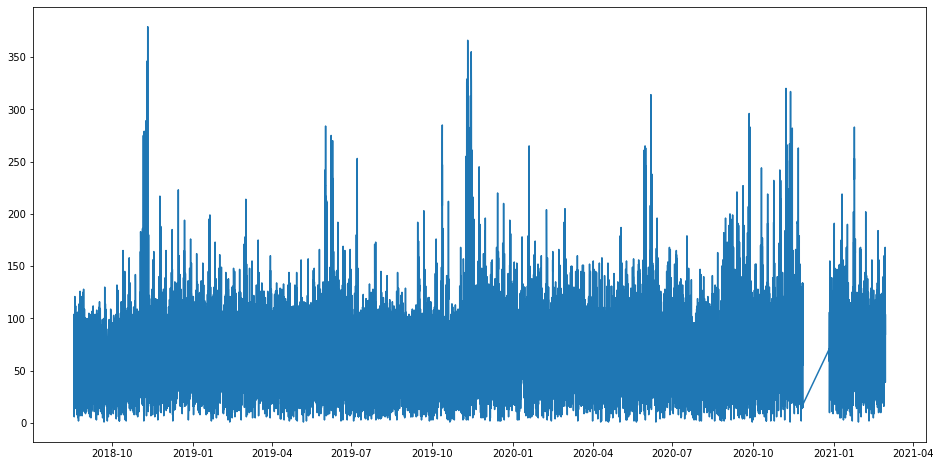

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_train['date'],df_train['demand'])
plt.show()

Split data for training and testing

In [ ]:
df_train.rename(columns={'date': 'date', 'demand': 'y'}, inplace=True)
train_data = df_train.sample(frac=0.8, random_state=10)

validation_data = df_train.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (14598, 2)
validation data size : (3649, 2)


Model training and evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [ ]:
model = Prophet()
model.fit(train_data)

ValueError: ignored

In [ ]:
validation_data['ds']

0      2018-08-18 13:00:00
1      2018-08-18 22:00:00
2      2018-08-19 08:00:00
3      2018-08-19 12:00:00
4      2018-08-19 14:00:00
               ...        
3644   2021-02-28 11:00:00
3645   2021-02-28 12:00:00
3646   2021-02-28 16:00:00
3647   2021-02-28 21:00:00
3648   2021-02-28 23:00:00
Name: ds, Length: 3649, dtype: datetime64[ns]

In [ ]:
prediction = model.predict(pd.DataFrame({'date':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_squared_error(y_actual, y_predicted)

1340.3020005480953

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Interview/Job A thon/test_6QvDdzb.csv')
print(f'test dataset size : {test_data.shape}')
testing_data = hour_to_datetime(test_data.copy())
testing_data.head()

test dataset size : (7650, 2)


,date
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00


In [ ]:
test_prediction = model.predict(pd.DataFrame({'ds':testing_data['date']}))

In [ ]:
test_prediction = test_prediction['yhat']
test_prediction = test_prediction.astype(int)
test_data['demand'] = test_prediction
test_data.head()
test_data.to_csv('sub_prophet.csv', index=False)